In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [9]:
df.drop(['name','ticket','cabin','boat','body','home.dest'],axis=1,inplace=True)


In [10]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0000,0.0,0.0,7.8750,S


In [11]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [12]:
df['age']=df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

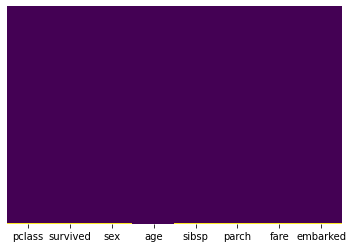

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,24.0000,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0000,0.0,0.0,7.8750,S


In [17]:
#calculating fare median value
al_fare1=df.survived.median()
al_fare1

0.0

In [19]:
df.fillna({'fare':14.4542,'sex':'male','pclass':3,'sibsp':3,'embarked':'S','survived':0})

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,24.0000,1.0,0.0,14.4542,C
1306,3.0,0.0,male,26.5000,0.0,0.0,7.2250,C
1307,3.0,0.0,male,27.0000,0.0,0.0,7.2250,C
1308,3.0,0.0,male,29.0000,0.0,0.0,7.8750,S


In [20]:
sex=pd.get_dummies(df['sex'],drop_first=True)
embarked=pd.get_dummies(df['embarked'],drop_first=True)

In [21]:
df.drop(['sex','embarked','parch'],axis=1,inplace=True)

In [22]:
df.head()

,pclass,survived,age,sibsp,fare
0,1.0,1.0,29.0000,0.0,211.3375
1,1.0,1.0,0.9167,1.0,151.5500
2,1.0,0.0,2.0000,1.0,151.5500
3,1.0,0.0,30.0000,1.0,151.5500
4,1.0,0.0,25.0000,1.0,151.5500


In [24]:
df=pd.concat([df,sex,embarked])

In [25]:
df.head()

,pclass,survived,age,sibsp,fare,male,Q,S
0,1.0,1.0,29.0000,0.0,211.3375,NaN,NaN,NaN
1,1.0,1.0,0.9167,1.0,151.5500,NaN,NaN,NaN
2,1.0,0.0,2.0000,1.0,151.5500,NaN,NaN,NaN
3,1.0,0.0,30.0000,1.0,151.5500,NaN,NaN,NaN
4,1.0,0.0,25.0000,1.0,151.5500,NaN,NaN,NaN


In [26]:
df.drop(['male','Q','S'],axis=1,inplace=True)

In [27]:
df

,pclass,survived,age,sibsp,fare
0,1.0,1.0,29.0000,0.0,211.3375
1,1.0,1.0,0.9167,1.0,151.5500
2,1.0,0.0,2.0000,1.0,151.5500
3,1.0,0.0,30.0000,1.0,151.5500
4,1.0,0.0,25.0000,1.0,151.5500
...,...,...,...,...,...
1305,NaN,NaN,NaN,NaN,NaN
1306,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,NaN
1308,NaN,NaN,NaN,NaN,NaN


In [28]:
df.fillna({'fare':14.4542,'pclass':3,'sibsp':3,'survived':0})

,pclass,survived,age,sibsp,fare
0,1.0,1.0,29.0000,0.0,211.3375
1,1.0,1.0,0.9167,1.0,151.5500
2,1.0,0.0,2.0000,1.0,151.5500
3,1.0,0.0,30.0000,1.0,151.5500
4,1.0,0.0,25.0000,1.0,151.5500
...,...,...,...,...,...
1305,3.0,0.0,NaN,3.0,14.4542
1306,3.0,0.0,NaN,3.0,14.4542
1307,3.0,0.0,NaN,3.0,14.4542
1308,3.0,0.0,NaN,3.0,14.4542


In [29]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [30]:
df['age']=df[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

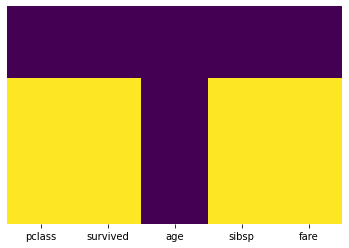

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
df

,pclass,survived,age,sibsp,fare
0,1.0,1.0,29.0000,0.0,211.3375
1,1.0,1.0,0.9167,1.0,151.5500
2,1.0,0.0,2.0000,1.0,151.5500
3,1.0,0.0,30.0000,1.0,151.5500
4,1.0,0.0,25.0000,1.0,151.5500
...,...,...,...,...,...
1305,NaN,NaN,24.0000,NaN,NaN
1306,NaN,NaN,24.0000,NaN,NaN
1307,NaN,NaN,24.0000,NaN,NaN
1308,NaN,NaN,24.0000,NaN,NaN


In [35]:
new_df=df.fillna({'fare':14.4542,'pclass':3,'sibsp':3,'survived':0})

In [36]:
new_df

,pclass,survived,age,sibsp,fare
0,1.0,1.0,29.0000,0.0,211.3375
1,1.0,1.0,0.9167,1.0,151.5500
2,1.0,0.0,2.0000,1.0,151.5500
3,1.0,0.0,30.0000,1.0,151.5500
4,1.0,0.0,25.0000,1.0,151.5500
...,...,...,...,...,...
1305,3.0,0.0,24.0000,3.0,14.4542
1306,3.0,0.0,24.0000,3.0,14.4542
1307,3.0,0.0,24.0000,3.0,14.4542
1308,3.0,0.0,24.0000,3.0,14.4542


<AxesSubplot:>

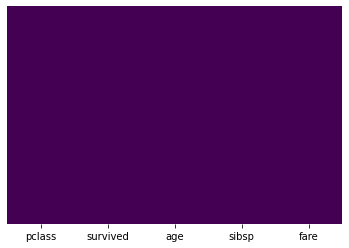

In [37]:
sns.heatmap(new_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
#buliding logistic regression model
x=new_df.drop('survived',axis=1)

In [39]:
y=new_df['survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=101)

In [44]:
#train and predicting
from sklearn.linear_model import LogisticRegression

In [45]:
logmod=LogisticRegression()
logmod.fit(x_train,y_train)

LogisticRegression()

In [47]:
pre=logmod.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [50]:
accuracy=confusion_matrix(y_test,pre)


In [51]:
accuracy

array([[989,  44],
       [ 89,  57]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
acc=accuracy_score(y_test,pre)
acc

0.8871925360474979

In [55]:
pre

array([0., 0., 0., ..., 0., 0., 0.])